In [55]:
import os 

os.chdir(r"C:\Users\lhgom\Documents\Proyectos Python\MT 5")

%run ManejoCuenta/ManejoCuenta.ipynb
%run DataHistorica/DataHistorica.ipynb
%run ManejoOrdenes/Ordenes.ipynb
%run ManejoCuenta/ManejoCuenta.ipynb
%run IndicadoresTecnicos/IndicadoresTecnicos.ipynb
%run Backtesting/BT_Corto.ipynb
%run Backtesting/BT_MacdOscilador.ipynb
%run KPIs/KPIs.ipynb

In [3]:
import MetaTrader5 as mt5
import datetime as dt
import pandas as pd
import time

# Leer llave seguridad

In [6]:
os.chdir(r"C:\Users\lhgom\Documents\Proyectos Python\MT 5")
key = open("key.txt").read().split()
path = r"C:\Program Files\MetaTrader 5\terminal64.exe"

# Inicializar Conexion

In [9]:
if mt5.initialize(path=path,login=int(key[0]),password=key[1],server=key[2]):
    print("Conexion Exitosa")

Conexion Exitosa


# Obtener Simbolos Acciones

In [20]:
tickers = ["GOOGL","META","AMZN","TSLA","XOM","GE","CAT","MSFT","LLY","JPM"]

# Descargar Data Historica

In [25]:
dataHistorica = extraer_data_historica_multiples_tickers(tickers,mt5.TIMEFRAME_M5,dt.datetime.now(),20000)

GOOGL
META
AMZN
TSLA
XOM
GE
CAT
MSFT
LLY
JPM


# Largo - Corto Velas 5 minutos

In [27]:
ohlc_dict,tickers_ret,trade_count,trade_data = backtest_macd_stoch_corto(dataHistorica,macd_a=6,macd_b=13,macd_c=4,oe_a=5,oe_b=4,oe_limite=30,atr_n=60,vr_ventana=250,vr_limite=1.5)
retornos_estrategia,retornos_diarios = calcular_retornos_estrategia(list(dataHistorica.keys()),ohlc_dict)
(1 + retornos_estrategia['ret']).cumprod().tail(1)

time
2024-06-20 18:50:00-04:00    1.98524
Name: ret, dtype: float64

<Axes: xlabel='time'>

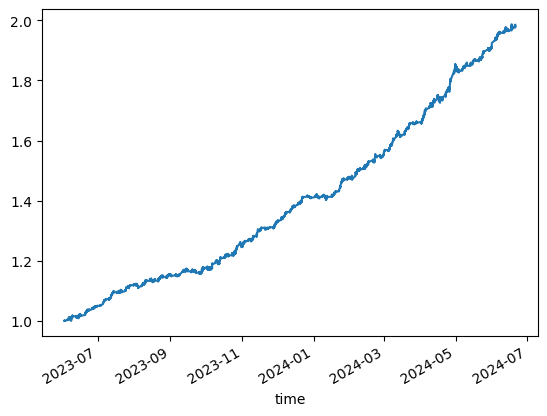

In [29]:
(1 + retornos_estrategia['ret']).cumprod().plot()

In [31]:
print("KPIs de la Estrategia")
print("Tasa Anual Compuesta de Crecimiento: ",CAGR(retornos_estrategia))
print("Ratio de Sharpe: ",ratio_de_sharpe(retornos_estrategia,0.055))
print("Volatilidad Anualizada: ",volatilidad_anualizada(retornos_estrategia))
print("Maxima Perdida: ",maxima_perdida(retornos_estrategia))

KPIs de la Estrategia
Tasa Anual Compuesta de Crecimiento:  0.25272888372999014
Ratio de Sharpe:  4.112194556977847
Volatilidad Anualizada:  0.04808354298180532
Maxima Perdida:  0.016031083841553457


In [36]:
KPIs_df = calcular_KPIs_individuales(list(dataHistorica.keys()),ohlc_dict)
KPIs_df

,Retorno,Ratio de Sharpe,Max Perdida
GOOGL,0.273274,1.709588,0.076476
META,0.214427,1.327533,0.101903
AMZN,0.144285,0.805207,0.150777
TSLA,0.527780,2.343609,0.106824
XOM,0.173931,1.419003,0.101122
GE,0.255016,1.946424,0.069217
CAT,0.331284,2.910395,0.051188
MSFT,0.138862,1.039630,0.115698
LLY,0.289439,2.188844,0.066419
JPM,0.159463,1.431997,0.073432


# Largo - Corto Velas 10 minutos

In [49]:
dataHistorica = extraer_data_historica_multiples_tickers(tickers,mt5.TIMEFRAME_M10,dt.datetime.now(),10000)

GOOGL
META
AMZN
TSLA
XOM
GE
CAT
MSFT
LLY
JPM


In [51]:
ohlc_dict,tickers_ret,trade_count,trade_data = backtest_macd_stoch_corto(dataHistorica,macd_a=6,macd_b=13,macd_c=4,oe_a=5,oe_b=4,oe_limite=30,atr_n=60,vr_ventana=250,vr_limite=1.5)
retornos_estrategia,retornos_diarios = calcular_retornos_estrategia(list(dataHistorica.keys()),ohlc_dict)
(1 + retornos_estrategia['ret']).cumprod().tail(1)

time
2024-06-20 18:50:00-04:00    1.746381
Name: ret, dtype: float64

<Axes: xlabel='time'>

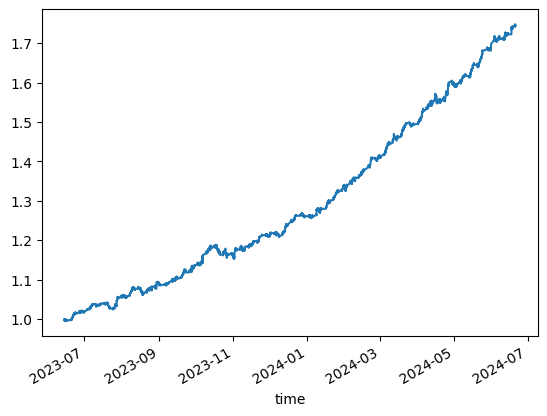

In [55]:
(1 + retornos_estrategia['ret']).cumprod().plot()

In [57]:
print("KPIs de la Estrategia")
print("Tasa Anual Compuesta de Crecimiento: ",CAGR(retornos_estrategia))
print("Ratio de Sharpe: ",ratio_de_sharpe(retornos_estrategia,0.055))
print("Volatilidad Anualizada: ",volatilidad_anualizada(retornos_estrategia))
print("Maxima Perdida: ",maxima_perdida(retornos_estrategia))

KPIs de la Estrategia
Tasa Anual Compuesta de Crecimiento:  0.44413263041070405
Ratio de Sharpe:  5.7997959332380145
Volatilidad Anualizada:  0.06709419346646772
Maxima Perdida:  0.029759193559577197


In [59]:
KPIs_df = calcular_KPIs_individuales(list(dataHistorica.keys()),ohlc_dict)
KPIs_df

,Retorno,Ratio de Sharpe,Max Perdida
GOOGL,0.493673,2.594174,0.086991
META,0.439460,2.272781,0.095551
AMZN,0.433738,2.359687,0.067231
TSLA,0.738921,2.484653,0.171488
XOM,0.539689,3.811404,0.065322
GE,0.208137,1.142393,0.099966
CAT,0.487252,2.989855,0.079364
MSFT,0.233915,1.531410,0.074202
LLY,0.591336,3.547394,0.100081
JPM,0.215910,1.575181,0.083322


# Velas 5 minutos, Acciones Sensibles a la Estrategia

In [65]:
tickers = ["MRNA","NOVA","CYRX","ENPH","AMD","ROKU","TSLA","SAVE","JD","PRAA"]
dataHistorica = extraer_data_historica_multiples_tickers(tickers,mt5.TIMEFRAME_M5,dt.datetime.now(),20000)

MRNA
NOVA
CYRX
ENPH
AMD
ROKU
TSLA
SAVE
JD
PRAA


## Solo Pierna Larga

In [76]:
ohlc_dict,tickers_ret,trade_count,trade_data = backtest_macd_stoch(dataHistorica,macd_a=6,macd_b=13,macd_c=4,oe_a=5,oe_b=4,oe_limite=30,atr_n=60,vr_ventana=250,vr_limite=1.5)
retornos_estrategia,retornos_diarios = calcular_retornos_estrategia(list(dataHistorica.keys()),ohlc_dict)
(1 + retornos_estrategia['ret']).cumprod().tail(1)

time
2024-06-20 18:50:00-04:00    4.809082
Name: ret, dtype: float64

## Pierna Larga y Corto

In [80]:
ohlc_dict,tickers_ret,trade_count,trade_data = backtest_macd_stoch_corto(dataHistorica,macd_a=6,macd_b=13,macd_c=4,oe_a=5,oe_b=4,oe_limite=30,atr_n=60,vr_ventana=250,vr_limite=1.5)
retornos_estrategia,retornos_diarios = calcular_retornos_estrategia(list(dataHistorica.keys()),ohlc_dict)
(1 + retornos_estrategia['ret']).cumprod().tail(1)

time
2024-06-20 18:50:00-04:00    6.7893
Name: ret, dtype: float64

<Axes: xlabel='time'>

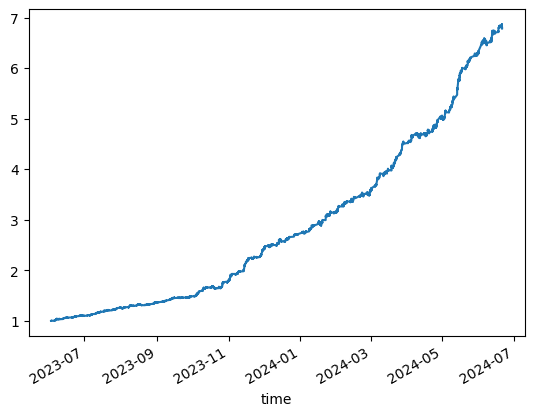

In [82]:
(1 + retornos_estrategia['ret']).cumprod().plot()

In [84]:
print("KPIs de la Estrategia")
print("Tasa Anual Compuesta de Crecimiento: ",CAGR(retornos_estrategia))
print("Ratio de Sharpe: ",ratio_de_sharpe(retornos_estrategia,0.055))
print("Volatilidad Anualizada: ",volatilidad_anualizada(retornos_estrategia))
print("Maxima Perdida: ",maxima_perdida(retornos_estrategia))

KPIs de la Estrategia
Tasa Anual Compuesta de Crecimiento:  0.8764018392277901
Ratio de Sharpe:  7.8743940998465005
Volatilidad Anualizada:  0.10431302127027171
Maxima Perdida:  0.03165380800725453


In [86]:
KPIs_df = calcular_KPIs_individuales(list(dataHistorica.keys()),ohlc_dict)
KPIs_df

,Retorno,Ratio de Sharpe,Max Perdida
MRNA,0.622144,2.980704,0.154786
NOVA,1.309462,2.793282,0.341899
CYRX,1.254061,4.546111,0.141332
ENPH,0.554405,2.268258,0.148023
AMD,0.544362,2.727788,0.126456
ROKU,1.090510,4.069887,0.124242
TSLA,0.527780,2.343609,0.106824
SAVE,0.815847,2.472706,0.196827
JD,0.753502,3.966081,0.081248
PRAA,1.035148,5.292364,0.127250


# Prueba desde 2020

In [102]:
tickers = ["MRNA","NOVA","CYRX","ENPH","AMD","ROKU","TSLA","SAVE","JD","PRAA"]
dataHistorica = extraer_data_historica_multiples_tickers(tickers,mt5.TIMEFRAME_M5,dt.datetime.now(),95000)

MRNA
NOVA
CYRX
ENPH
AMD
ROKU
TSLA
SAVE
JD
PRAA


In [106]:
ohlc_dict,tickers_ret,trade_count,trade_data = backtest_macd_stoch_corto(dataHistorica,macd_a=6,macd_b=13,macd_c=4,oe_a=5,oe_b=4,oe_limite=30,atr_n=60,vr_ventana=250,vr_limite=1.5)
retornos_estrategia,retornos_diarios = calcular_retornos_estrategia(list(dataHistorica.keys()),ohlc_dict)
(1 + retornos_estrategia['ret']).cumprod().tail(1)

time
2024-06-20 18:50:00-04:00    722.560934
Name: ret, dtype: float64

<Axes: xlabel='time'>

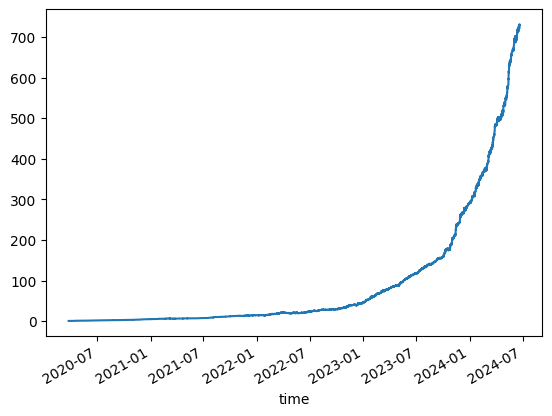

In [109]:
(1 + retornos_estrategia['ret']).cumprod().plot()

In [111]:
print("KPIs de la Estrategia")
print("Tasa Anual Compuesta de Crecimiento: ",CAGR(retornos_estrategia))
print("Ratio de Sharpe: ",ratio_de_sharpe(retornos_estrategia,0.055))
print("Volatilidad Anualizada: ",volatilidad_anualizada(retornos_estrategia))
print("Maxima Perdida: ",maxima_perdida(retornos_estrategia))

KPIs de la Estrategia
Tasa Anual Compuesta de Crecimiento:  0.6989249410960667
Ratio de Sharpe:  4.065186815143722
Volatilidad Anualizada:  0.15839984000176907
Maxima Perdida:  0.13720331993152277


In [86]:
KPIs_df = calcular_KPIs_individuales(list(dataHistorica.keys()),ohlc_dict)
KPIs_df

,Retorno,Ratio de Sharpe,Max Perdida
MRNA,0.622144,2.980704,0.154786
NOVA,1.309462,2.793282,0.341899
CYRX,1.254061,4.546111,0.141332
ENPH,0.554405,2.268258,0.148023
AMD,0.544362,2.727788,0.126456
ROKU,1.090510,4.069887,0.124242
TSLA,0.527780,2.343609,0.106824
SAVE,0.815847,2.472706,0.196827
JD,0.753502,3.966081,0.081248
PRAA,1.035148,5.292364,0.127250


# 20 Acciones

In [11]:
tickers = ["MRNA","NOVA","CYRX","ENPH","AMD","ROKU","TSLA","SAVE","JD","PRAA",
           "MSTR","COIN","PLUG","RUN","RIVN","MRCY","DASH","PSTG","APLS","ENTA"]
dataHistorica = extraer_data_historica_multiples_tickers(tickers,mt5.TIMEFRAME_M5,dt.datetime.now(),20000)

MRNA
NOVA
CYRX
ENPH
AMD
ROKU
TSLA
SAVE
JD
PRAA
MSTR
COIN
PLUG
RUN
RIVN
MRCY
DASH
PSTG
APLS
ENTA


## Pierna Larga y Corto

In [14]:
ohlc_dict,tickers_ret,trade_count,trade_data = backtest_macd_stoch_corto(dataHistorica,macd_a=6,macd_b=13,macd_c=4,oe_a=5,oe_b=4,oe_limite=30,atr_n=60,vr_ventana=250,vr_limite=1.5)
retornos_estrategia,retornos_diarios = calcular_retornos_estrategia(list(dataHistorica.keys()),ohlc_dict)
(1 + retornos_estrategia['ret']).cumprod().tail(1)

time
2024-06-21 13:35:00-04:00    6.125105
Name: ret, dtype: float64

<Axes: xlabel='time'>

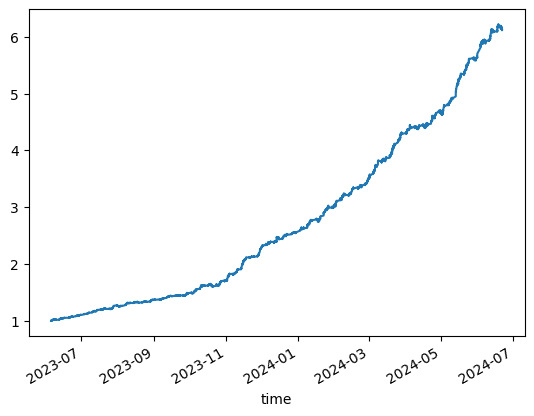

In [16]:
(1 + retornos_estrategia['ret']).cumprod().plot()

In [18]:
print("KPIs de la Estrategia")
print("Tasa Anual Compuesta de Crecimiento: ",CAGR(retornos_estrategia))
print("Ratio de Sharpe: ",ratio_de_sharpe(retornos_estrategia,0.055))
print("Volatilidad Anualizada: ",volatilidad_anualizada(retornos_estrategia))
print("Maxima Perdida: ",maxima_perdida(retornos_estrategia))

KPIs de la Estrategia
Tasa Anual Compuesta de Crecimiento:  4.969018278253831
Ratio de Sharpe:  31.188791250961668
Volatilidad Anualizada:  0.15755718901425247
Maxima Perdida:  0.02967365868670211


In [20]:
KPIs_df = calcular_KPIs_individuales(list(dataHistorica.keys()),ohlc_dict)
KPIs_df

,Retorno,Ratio de Sharpe,Max Perdida
MRNA,3.163363,9.450201,0.154786
NOVA,10.900988,13.933367,0.341899
CYRX,10.518082,22.895618,0.141332
ENPH,2.726868,7.000214,0.148023
AMD,2.777791,8.753833,0.126456
ROKU,7.943219,17.904911,0.124242
TSLA,2.610622,7.314574,0.106824
SAVE,5.012225,9.275486,0.196827
JD,4.277991,13.857033,0.081248
PRAA,7.643375,23.615514,0.127250


# Acciones constituyentes del S&P 500

In [15]:
tickers = ["MRNA","CRWD","NVDA","ENPH","AMD","MASI","TSLA","CCL","ABNB","FCX"]
dataHistorica = extraer_data_historica_multiples_tickers(tickers,mt5.TIMEFRAME_M5,dt.datetime.now(),20000)

MRNA
CRWD
NVDA
ENPH
AMD
MASI
TSLA
CCL
ABNB
FCX


In [17]:
ohlc_dict,tickers_ret,trade_count,trade_data = backtest_macd_stoch_corto(dataHistorica,macd_a=6,macd_b=13,macd_c=4,oe_a=5,oe_b=4,oe_limite=30,atr_n=60,vr_ventana=250,vr_limite=1.5)
retornos_estrategia,retornos_diarios = calcular_retornos_estrategia(list(dataHistorica.keys()),ohlc_dict)
(1 + retornos_estrategia['ret']).cumprod().tail(1)

time
2024-06-24 09:05:00-04:00    3.294522
Name: ret, dtype: float64

<Axes: xlabel='time'>

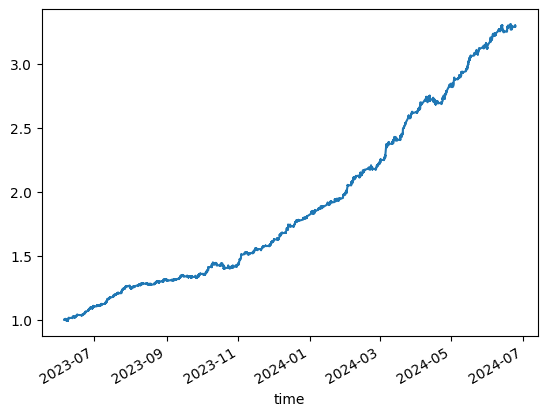

In [19]:
(1 + retornos_estrategia['ret']).cumprod().plot()

In [21]:
print("KPIs de la Estrategia")
print("Tasa Anual Compuesta de Crecimiento: ",CAGR(retornos_estrategia))
print("Ratio de Sharpe: ",ratio_de_sharpe(retornos_estrategia,0.055))
print("Volatilidad Anualizada: ",volatilidad_anualizada(retornos_estrategia))
print("Maxima Perdida: ",maxima_perdida(retornos_estrategia))

KPIs de la Estrategia
Tasa Anual Compuesta de Crecimiento:  2.2390496273468794
Ratio de Sharpe:  16.8342002199996
Volatilidad Anualizada:  0.12973884109755057
Maxima Perdida:  0.03476659492935404


In [23]:
KPIs_df = calcular_KPIs_individuales(list(dataHistorica.keys()),ohlc_dict)
KPIs_df

,Retorno,Ratio de Sharpe,Max Perdida
MRNA,3.130273,9.348402,0.154786
CRWD,2.821492,8.601796,0.133007
NVDA,1.142148,3.850194,0.161917
ENPH,2.682597,6.883297,0.148023
AMD,2.772691,8.731955,0.126456
MASI,1.594975,6.226862,0.122183
TSLA,2.667988,7.463919,0.106824
CCL,1.343521,3.913447,0.160138
ABNB,2.177855,9.088471,0.076610
FCX,1.555257,6.259202,0.060717


# Acciones con volumen diario > 1.000.000

In [11]:
tickers = ["MRNA","MASI","CYRX","ENPH","AMD","ROKU","TSLA","SAVE","JD","ABNB"]
dataHistorica = extraer_data_historica_multiples_tickers(tickers,mt5.TIMEFRAME_M5,dt.datetime.now(),20000)

MRNA
MASI
CYRX
ENPH
AMD
ROKU
TSLA
SAVE
JD
ABNB


In [13]:
ohlc_dict,tickers_ret,trade_count,trade_data = backtest_macd_stoch_corto(dataHistorica,macd_a=6,macd_b=13,macd_c=4,oe_a=5,oe_b=4,oe_limite=30,atr_n=60,vr_ventana=250,vr_limite=1.5)
retornos_estrategia,retornos_diarios = calcular_retornos_estrategia(list(dataHistorica.keys()),ohlc_dict)
(1 + retornos_estrategia['ret']).cumprod().tail(1)

time
2024-06-24 13:10:00-04:00    5.017799
Name: ret, dtype: float64

<Axes: xlabel='time'>

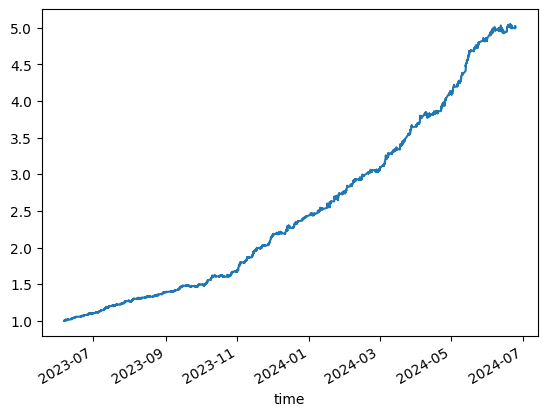

In [15]:
(1 + retornos_estrategia['ret']).cumprod().plot()

In [21]:
print("KPIs Interdiarios de la Estrategia")
print("Tasa Anual Compuesta de Crecimiento: ",CAGR(retornos_estrategia))
print("Ratio de Sharpe: ",ratio_de_sharpe(retornos_estrategia,0.055))
print("Volatilidad Anualizada: ",volatilidad_anualizada(retornos_estrategia))
print("Maxima Perdida: ",maxima_perdida(retornos_estrategia))

KPIs de la Estrategia
Tasa Anual Compuesta de Crecimiento:  2.2390496273468794
Ratio de Sharpe:  16.8342002199996
Volatilidad Anualizada:  0.12973884109755057
Maxima Perdida:  0.03476659492935404


In [59]:
print("KPIs Intradiarios de la Estrategia")
print("Tasa de Exito por Operacion: ",tasa_exito_por_operacion(retornos_estrategia))
print("Retorno Medio por Operacion: ",ret_medio_por_operacion(retornos_estrategia))
print("Retorno Medio por Operacion Exitosa: ",ret_medio_por_operacion_exitosa(retornos_estrategia))
print("Retorno Medio por Operacion No Exitosa: ",ret_medio_por_operacion_no_exitosa(retornos_estrategia))
print("Maximo Numero de Perdidas Consecutivas: ",max_num_perdidas_consectv(retornos_estrategia))

KPIs Intradiarios de la Estrategia
Tasa de Exito por Operacion:  50.7023815517849
Retorno Medio por Operacion:  8.17557641047772e-05
Retorno Medio por Operacion Exitosa:  0.0006685747202162911
Retorno Medio por Operacion No Exitosa:  -0.0005217849251039804
Maximo Numero de Perdidas Consecutivas:  12


In [57]:
KPIs_df = calcular_KPIs_individuales(list(dataHistorica.keys()),ohlc_dict)
KPIs_df

,Retorno,Ratio de Sharpe,Max Perdida,Tasa Exito por Oper.,Ret Medio por Oper.,Ret Medio por Oper. Exitosa,Ret Medio por Oper. no Exitosa,Max # perdidas Consecutivas
MRNA,3.135320,9.366223,0.154786,49.392684,0.000105,0.001913,-0.001660,12.0
MASI,1.667176,6.516313,0.122183,48.971861,0.000079,0.001503,-0.001287,9.0
CYRX,9.676371,21.066208,0.141332,49.593566,0.000214,0.003155,-0.002679,9.0
ENPH,2.831821,7.273640,0.148023,49.256738,0.000100,0.002204,-0.001943,12.0
AMD,2.931444,9.239559,0.126456,49.698472,0.000096,0.001776,-0.001564,9.0
ROKU,7.476949,16.863147,0.124242,50.147430,0.000159,0.002176,-0.001870,9.0
TSLA,2.631661,7.362430,0.106824,48.970175,0.000092,0.001879,-0.001624,12.0
SAVE,4.749739,8.776171,0.196827,50.346522,0.000168,0.003271,-0.002978,9.0
JD,4.274449,13.826879,0.081248,49.825836,0.000128,0.001409,-0.001143,9.0
ABNB,2.095999,8.776148,0.076610,49.427428,0.000081,0.001369,-0.001177,10.0
